In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://files.stlouisfed.org/files/htdocs/fred-md/monthly/current.csv')
df=pd.DataFrame(df)
df1=df.copy()

In [3]:
df1=df.copy()
df1.index=df1.sasdate
df1=df1['1/1/1959':'9/1/2022']
df1.head(5)

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1/1/1959,1/1/1959,2442.158,2293.2,17.272,292266.4261,18235.77392,22.0151,23.3984,22.2848,31.5847,...,17.791,11.326,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2/1/1959,2/1/1959,2451.778,2301.5,17.452,294424.7425,18369.56308,22.4463,23.7142,22.4778,31.8164,...,17.798,11.343,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3/1/1959,3/1/1959,2467.594,2318.5,17.617,293418.6704,18523.05762,22.7696,23.8577,22.5882,31.8164,...,17.785,11.363,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4/1/1959,4/1/1959,2483.671,2334.9,17.553,299322.8039,18534.46600,23.2547,24.2022,22.9191,32.3184,...,17.796,11.403,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
5/1/1959,5/1/1959,2498.026,2350.4,17.765,301364.3249,18679.66354,23.6050,24.4032,23.1398,32.4728,...,17.777,11.421,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


In [4]:
#parse dates
df1['year']=df1.sasdate.str[4:]
df1['month']=df1.sasdate.str[:2]
df1.month=df1.month.str.replace('/','')
df1['date']=pd.to_datetime(df1.year+"-"+df1.month+"-01")
df1.index=df1.date
df1=df1.drop(columns=['date','sasdate'])
df1

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,year,month
date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2442.158,2293.2,17.272,2.922664e+05,18235.77392,22.0151,23.3984,22.2848,31.5847,18.6861,...,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN,1959,1
1959-02-01,2451.778,2301.5,17.452,2.944247e+05,18369.56308,22.4463,23.7142,22.4778,31.8164,18.7842,...,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN,1959,2
1959-03-01,2467.594,2318.5,17.617,2.934187e+05,18523.05762,22.7696,23.8577,22.5882,31.8164,19.1520,...,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN,1959,3
1959-04-01,2483.671,2334.9,17.553,2.993228e+05,18534.46600,23.2547,24.2022,22.9191,32.3184,19.2746,...,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN,1959,4
1959-05-01,2498.026,2350.4,17.765,3.013643e+05,18679.66354,23.6050,24.4032,23.1398,32.4728,19.6670,...,2.17,2.48,2.08,95.3,6753.00,12646.00,80.7315,NaN,1959,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,17681.348,14514.6,127.570,1.541414e+06,677115.00000,104.1848,104.2606,104.8647,105.2480,113.2550,...,27.84,32.14,24.94,58.4,368105.69,734917.57,5788.6879,29.1728,2022,5
2022-06-01,17608.608,14457.8,127.830,1.536205e+06,684084.00000,104.0982,103.6719,104.3560,104.4764,111.3413,...,27.91,32.27,24.96,50.0,368881.15,733048.56,5774.7711,28.2445,2022,6
2022-07-01,17698.957,14557.7,127.693,1.545055e+06,681108.00000,104.8526,104.3788,105.0153,104.9793,113.5795,...,28.02,32.41,25.05,51.5,370193.63,733721.63,5776.3394,24.5288,2022,7


In [5]:
df1=df1.fillna(0)
df1.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,year,month
date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2442.158,2293.2,17.272,292266.4261,18235.77392,22.0151,23.3984,22.2848,31.5847,18.6861,...,2.13,2.45,2.04,0.0,6476.0,12298.0,84.2043,0.0,1959,1
1959-02-01,2451.778,2301.5,17.452,294424.7425,18369.56308,22.4463,23.7142,22.4778,31.8164,18.7842,...,2.14,2.46,2.05,0.0,6476.0,12298.0,83.5280,0.0,1959,2
1959-03-01,2467.594,2318.5,17.617,293418.6704,18523.05762,22.7696,23.8577,22.5882,31.8164,19.1520,...,2.15,2.45,2.07,0.0,6508.0,12349.0,81.6405,0.0,1959,3
1959-04-01,2483.671,2334.9,17.553,299322.8039,18534.46600,23.2547,24.2022,22.9191,32.3184,19.2746,...,2.16,2.47,2.08,0.0,6620.0,12484.0,81.8099,0.0,1959,4
1959-05-01,2498.026,2350.4,17.765,301364.3249,18679.66354,23.6050,24.4032,23.1398,32.4728,19.6670,...,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,0.0,1959,5


In [64]:
import quandl
quandl.ApiConfig.api_key = "xBuaKGc32Uz65EL8qZpW"
#xBuaKGc32Uz65EL8qZpW
stock = quandl.get('WIKI/A')


In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
stock=stock.resample('M').last()
#date month day to '1'
stock.index= stock.index - pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)
stock

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1999-11-01,42.00,42.94,40.94,42.19,3083000.0,0.0,1.0,28.654109,29.295415,27.930934,28.783735,3083000.0
1999-12-01,79.50,79.94,76.25,77.31,1381400.0,0.0,1.0,54.238135,54.538320,52.020852,52.744027,1381400.0
2000-01-01,67.56,67.63,64.75,66.19,744200.0,0.0,1.0,46.092181,46.139938,44.175084,45.157511,744200.0
2000-02-01,101.40,105.20,101.30,103.90,685300.0,0.0,1.0,69.179206,71.771720,69.110982,70.884807,685300.0
2000-03-01,106.00,106.00,90.00,104.00,2670200.0,0.0,1.0,72.317513,72.317513,61.401662,70.953031,2670200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-01,68.97,69.59,68.21,69.24,1872494.0,0.0,1.0,68.970000,69.590000,68.210000,69.240000,1872494.0
2017-12-01,67.50,67.58,66.93,66.97,1061239.0,0.0,1.0,67.500000,67.580000,66.930000,66.970000,1061239.0
2018-01-01,73.77,74.39,73.24,73.43,1949108.0,0.0,1.0,73.770000,74.390000,73.240000,73.430000,1949108.0


In [67]:
stock=stock.sort_index()
stock=stock['Adj. Close']


In [68]:
#!pip install mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

n=30
def xr(X,y,n):
    rf=RandomForestRegressor(n_estimators=200,n_jobs=-1)
    rf.fit(X,y)
    importances = pd.Series(rf.feature_importances_,index=X.columns)
    imp=pd.DataFrame(importances)
    imp.columns=['id']
    imp=imp.sort_values(by='id',ascending=False)
    imp=imp.head(n)
    feats=imp.index.unique()
    top_feats=X[feats]
    return top_feats

def rfe_func(X,y,n):
    #rf=RandomForestRegressor(n_estimators=200,n_jobs=-1)
    rf=RandomForestRegressor(n_estimators=200,n_jobs=-1)
    rf=LinearRegression()
    efs1 = EFS(rf, 
           min_features=1,
           max_features=n,
           scoring='r2', #neg_mean_absolute_error
           print_progress=True,
           n_jobs=-1,
           cv=4)

    efs1=efs1.fit(X,y)
    feats=efs1.best_feature_names_
    feats=list(feats)
    print(feats)
    imp_feats=X[feats]

    return imp_feats
    



In [94]:
def expand_data(X):
    #lags
    df2=X.copy()
    df2.index=df2.index.shift(12,freq="MS")
    lag = [0,1,2,3,4,5,6,12,13,14,15,16]

    for col in df2.columns:
        for l in lag:
            df2.loc[:,col+"_"+str(l)] = df2[col].shift(l)
    #z's
    from scipy.stats import zscore
    df2.fillna(0,inplace=True)
    
    df3=df2.apply(zscore)
    df3=df3.add_suffix("_z")
    
    df2=pd.concat([df3,df2],axis=1)
    df2=df2.fillna(0)
    return df2
#expand_data(X)

In [95]:
#set start/end dates, X and y df's

y=stock.copy()
#y=y.resample('M').last()
y=pd.DataFrame(y)
start=y.index.min()
end=y.index.max()

df_ex=df1.drop(columns=['year','month'])

"""
y_shift=y.copy()
y_shift.index=y_shift.index.shift(12,"MS")
mi=df_ex.index.min()
ma=df_ex.index.max()
y_shift=y_shift[mi:ma]

df_ex=pd.concat([df_ex,y_shift],axis=1)
df_ex=df_ex.bfill()
"""

df_ex=expand_data(df_ex)
X=df_ex.copy()

X=X[start:end]

X

,RPI_z,W875RX1_z,DPCERA3M086SBEA_z,CMRMTSPLx_z,RETAILx_z,INDPRO_z,IPFPNSS_z,IPFINAL_z,IPCONGD_z,IPDCONGD_z,...,VIXCLSx_2,VIXCLSx_3,VIXCLSx_4,VIXCLSx_5,VIXCLSx_6,VIXCLSx_12,VIXCLSx_13,VIXCLSx_14,VIXCLSx_15,VIXCLSx_16
date,,,,,,,,,,,,,,,,,,,,,
1999-11-01,0.345811,0.419557,0.320073,0.536289,0.219014,0.759841,0.915446,0.868430,0.901111,0.910901,...,39.2471,31.4885,20.2518,22.2231,21.4485,31.5452,25.6252,25.5928,25.1538,23.2477
1999-12-01,0.351428,0.425035,0.338145,0.556990,0.232128,0.773825,0.920304,0.870169,0.903462,0.935790,...,37.4540,39.2471,31.4885,20.2518,22.2231,26.4731,31.5452,25.6252,25.5928,25.1538
2000-01-01,0.360191,0.432477,0.336273,0.553364,0.234108,0.787487,0.939182,0.890480,0.946646,0.938115,...,25.0380,37.4540,39.2471,31.4885,20.2518,24.4275,26.4731,31.5452,25.6252,25.5928
2000-02-01,0.369872,0.444097,0.346858,0.595190,0.249641,0.806393,0.955652,0.908967,0.964618,0.965220,...,25.4768,25.0380,37.4540,39.2471,31.4885,20.3863,24.4275,26.4731,31.5452,25.6252
2000-03-01,0.372810,0.445784,0.357597,0.591146,0.256359,0.813343,0.950676,0.902935,0.955269,0.956553,...,28.6168,25.4768,25.0380,37.4540,39.2471,20.5431,20.3863,24.4275,26.4731,31.5452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-01,1.501714,1.496735,1.508229,1.465211,1.495292,1.198040,1.023092,1.044483,0.927100,1.253255,...,14.1336,12.2931,13.0704,18.5502,14.7401,16.1770,16.4927,24.2515,19.9964,14.6217
2017-12-01,1.509488,1.506722,1.530903,1.508984,1.532707,1.220914,1.054841,1.094169,0.989561,1.264926,...,14.5743,14.1336,12.2931,13.0704,18.5502,18.3855,16.1770,16.4927,24.2515,19.9964
2018-01-01,1.520819,1.519034,1.533296,1.518176,1.560879,1.214443,1.035770,1.066127,0.935519,1.275444,...,14.9940,14.5743,14.1336,12.2931,13.0704,23.5714,18.3855,16.1770,16.4927,24.2515


In [96]:
n=27
XX=X.copy()
top_feats=xr(XX,y,n)
#top_feats

In [97]:
"""
y_shift=y.copy()
#y_shift.index=y_shift.index.shift(12,"MS")
mi=top_feats.index.min()
ma=top_feats.index.max()

y_shift=expand_data(y_shift)
y_shift=y_shift.bfill()
y_shift=y_shift[mi:ma]

top_feats=pd.concat([top_feats,y_shift],axis=1)
top_feats.bfill(inplace=True)
top_feats.fillna(0,inplace=True)
"""
n=20
top_feats=xr(top_feats,y,n)

reduced=rfe_func(top_feats,y,3)
reduced

Features: 1350/1350

['IPDCONGD_16_z', 'ISRATIOx_4_z', 'ISRATIOx_4']


,IPDCONGD_16_z,ISRATIOx_4_z,ISRATIOx_4
date,,,
1999-11-01,0.624232,-0.096097,1.45
1999-12-01,0.682757,-0.157959,1.44
2000-01-01,0.703554,-0.157959,1.44
2000-02-01,0.741264,-0.219821,1.43
2000-03-01,0.812771,-0.219821,1.43
...,...,...,...
2017-11-01,1.368498,-0.281682,1.42
2017-12-01,1.280718,-0.281682,1.42
2018-01-01,1.264996,-0.281682,1.42


In [98]:
model=RandomForestRegressor(n_estimators=100)
model=LinearRegression()
model.fit(reduced.iloc[:-36],y.iloc[:-36])
preds=model.predict(reduced)
preds=pd.DataFrame(preds)
preds.columns=['pred']
preds.index=y.index
preds_s1=preds.copy()
combo=pd.concat([preds,y],axis=1)


<AxesSubplot: xlabel='Date'>

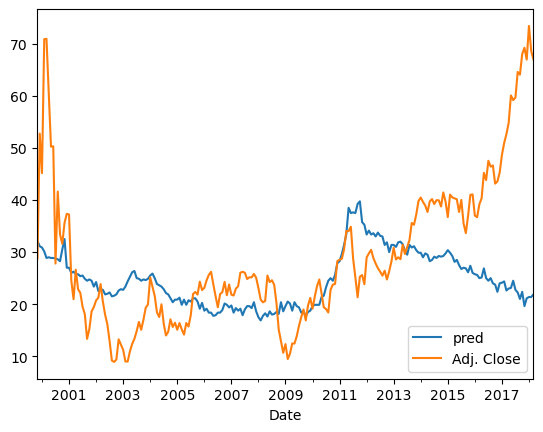

In [99]:
combo.plot()

In [100]:
reduced.head()


,IPDCONGD_16_z,ISRATIOx_4_z,ISRATIOx_4
date,,,
1999-11-01,0.624232,-0.096097,1.45
1999-12-01,0.682757,-0.157959,1.44
2000-01-01,0.703554,-0.157959,1.44
2000-02-01,0.741264,-0.219821,1.43
2000-03-01,0.812771,-0.219821,1.43


In [101]:
import pmdarima as pm
reduced=pd.concat([reduced,preds_s1],axis=1)

y_train=y.iloc[:-36]
y_test=y.iloc[-36:]
X_train=reduced.iloc[:-36]
X_test=reduced.iloc[-36:]

model=pm.auto_arima(y=y_train,X=X_train,start_p=0,d=1,start_q=0,
          max_p=2,max_d=2,max_q=2, start_P=0,
          D=1, start_Q=0, max_P=3,max_D=3,
          max_Q=3, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=False,
          random_state=20,n_fits=50,n_jobs=-1)




Best model:  ARIMA(1,1,1)(1,1,1)[12]          
Total fit time: 12.642 seconds


<AxesSubplot: >

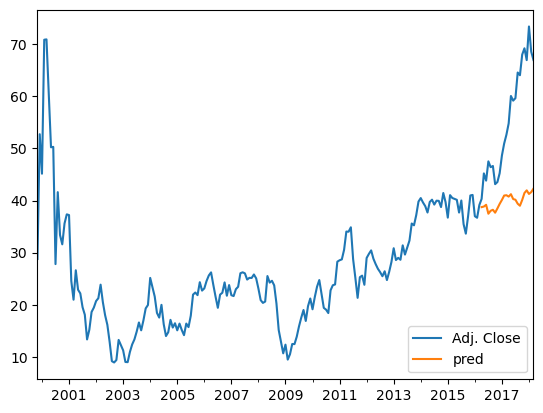

In [102]:
#model.fit(y=y_train,X=X_train)
def ar(y,reduced):
    adj=-24
    y_train=y.iloc[:-24]
    y_test=y.iloc[-24:]
    X_train=reduced.iloc[:-24]
    X_test=reduced.iloc[-24:]
    model.fit(X=X_train,y=y_train)
    preds=model.predict(X=X_test,n_periods=24)
    preds=pd.DataFrame(preds)
    preds.columns=['pred']

    preds=pd.concat([preds,y_test],axis=1)
    combo=pd.concat([y_train,preds],axis=0)
    return combo
combo=ar(y,reduced)
combo.plot()